In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint
from sklearn.model_selection import cross_val_score

This notebook is based on the "Base_model" notebook, and demonstrates how to easily replicate the proccess with refined dataframes

In [5]:
url = 'https://raw.githubusercontent.com/cbarnes5/DATA606CapstoneProject/main/refined_data_sample_v1.3.csv' #Replace with location of new csv. Make sure to select 'raw' on github to get the correct URL
df = pd.read_csv(url, index_col = 0)

In [6]:
df

,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,...,YEAR BUILT,HOA/MONTH,LATITUDE,LONGITUDE,closest_greenspace_direct,closest_greenspace_coords,closest_greenspace_centercoord,closest_greenspace_area,closest_metro_direct,closest_metro_loc
0,2024-04-15,Condo/Co-op,1391 Pennsylvania Ave SE #354,Washington,DC,20003.0,295000.0,0.0,1.0,Old City 1,...,2007.0,310.0,38.880206,-76.987612,0.089665,"POLYGON ((-76.9876531 38.8812678, -76.9859939 ...","(38.880895158611395, -76.98690604265991)",2.283448e-07,0.218198,"(38.8807824, -76.9852027)"
1,2024-05-10,Townhouse,1346 K St SE,Washington,DC,20003.0,560000.0,3.0,1.0,Old City 1,...,1926.0,0.0,38.878566,-76.986884,0.162044,"POLYGON ((-76.9892707 38.8792068, -76.9892605 ...","(38.87912096694103, -76.98902134309195)",9.234185e-08,0.286195,"(38.8807824, -76.9852027)"
2,2024-03-28,Condo/Co-op,1391 Pennsylvania Ave SE #311,Washington,DC,20003.0,695000.0,2.0,2.0,Old City 1,...,2007.0,831.0,38.880206,-76.987612,0.089665,"POLYGON ((-76.9876531 38.8812678, -76.9859939 ...","(38.880895158611395, -76.98690604265991)",2.283448e-07,0.218198,"(38.8807824, -76.9852027)"
3,2024-03-22,Townhouse,1507 Freedom Way SE,Washington,DC,20003.0,785000.0,3.0,3.5,HILL EAST,...,1979.0,0.0,38.879773,-76.982862,0.045221,"POLYGON ((-76.9817562 38.8787346, -76.9825961 ...","(38.87915802926877, -76.9826381177721)",2.324210e-07,0.231572,"(38.8807824, -76.9852027)"
4,2024-04-15,Condo/Co-op,1391 Pennsylvania Ave SE #426,Washington,DC,20003.0,425000.0,1.0,1.0,Old City 1,...,2007.0,475.0,38.880206,-76.987612,0.089665,"POLYGON ((-76.9876531 38.8812678, -76.9859939 ...","(38.880895158611395, -76.98690604265991)",2.283448e-07,0.218198,"(38.8807824, -76.9852027)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2424,2024-04-26,Single Family Residential,2706 Valley Dr,Alexandria,VA,22302.0,1625000.0,5.0,4.5,BRADDOCK HEIGHTS,...,1940.0,0.0,38.828810,-77.079460,0.624637,"POLYGON ((-77.0721127 38.8280462, -77.0716931 ...","(38.82875249093567, -77.07133117919139)",2.044396e-06,2.779584,"(38.813745, -77.0538557)"
2425,2024-05-16,Condo/Co-op,3212 Wellington Rd #103,Alexandria,VA,22302.0,429000.0,2.0,1.0,PARKFAIRFAX,...,1941.0,542.0,38.834207,-77.077879,0.556461,"POLYGON ((-77.0713203 38.8324603, -77.0709505 ...","(38.832984092863214, -77.07016605328616)",2.649278e-06,2.642600,"(38.8328203, -77.0474221)"
2426,2024-04-12,Townhouse,1724 Preston Rd,Alexandria,VA,22302.0,422000.0,2.0,1.0,PARKFAIRFAX,...,1941.0,561.0,38.835865,-77.082432,0.352164,"POLYGON ((-77.0863343 38.8349505, -77.0865616 ...","(38.83496499261363, -77.08755344358819)",3.513114e-06,3.051325,"(38.8328203, -77.0474221)"
2427,2024-04-26,Condo/Co-op,1606 Ripon Pl,Alexandria,VA,22302.0,380000.0,2.0,1.0,PARKFAIRFAX,...,1941.0,495.0,38.834562,-77.082253,0.356985,"POLYGON ((-77.0863343 38.8349505, -77.0865616 ...","(38.83496499261363, -77.08755344358819)",3.513114e-06,3.023173,"(38.8328203, -77.0474221)"


First we OHE the property type column

In [7]:
df = pd.get_dummies(df, columns=['PROPERTY TYPE'], dtype = int)
df

,SOLD DATE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,...,closest_greenspace_direct,closest_greenspace_coords,closest_greenspace_centercoord,closest_greenspace_area,closest_metro_direct,closest_metro_loc,PROPERTY TYPE_Condo/Co-op,PROPERTY TYPE_Multi-Family (2-4 Unit),PROPERTY TYPE_Single Family Residential,PROPERTY TYPE_Townhouse
0,2024-04-15,1391 Pennsylvania Ave SE #354,Washington,DC,20003.0,295000.0,0.0,1.0,Old City 1,451.0,...,0.089665,"POLYGON ((-76.9876531 38.8812678, -76.9859939 ...","(38.880895158611395, -76.98690604265991)",2.283448e-07,0.218198,"(38.8807824, -76.9852027)",1,0,0,0
1,2024-05-10,1346 K St SE,Washington,DC,20003.0,560000.0,3.0,1.0,Old City 1,1400.0,...,0.162044,"POLYGON ((-76.9892707 38.8792068, -76.9892605 ...","(38.87912096694103, -76.98902134309195)",9.234185e-08,0.286195,"(38.8807824, -76.9852027)",0,0,0,1
2,2024-03-28,1391 Pennsylvania Ave SE #311,Washington,DC,20003.0,695000.0,2.0,2.0,Old City 1,1234.0,...,0.089665,"POLYGON ((-76.9876531 38.8812678, -76.9859939 ...","(38.880895158611395, -76.98690604265991)",2.283448e-07,0.218198,"(38.8807824, -76.9852027)",1,0,0,0
3,2024-03-22,1507 Freedom Way SE,Washington,DC,20003.0,785000.0,3.0,3.5,HILL EAST,1766.0,...,0.045221,"POLYGON ((-76.9817562 38.8787346, -76.9825961 ...","(38.87915802926877, -76.9826381177721)",2.324210e-07,0.231572,"(38.8807824, -76.9852027)",0,0,0,1
4,2024-04-15,1391 Pennsylvania Ave SE #426,Washington,DC,20003.0,425000.0,1.0,1.0,Old City 1,684.0,...,0.089665,"POLYGON ((-76.9876531 38.8812678, -76.9859939 ...","(38.880895158611395, -76.98690604265991)",2.283448e-07,0.218198,"(38.8807824, -76.9852027)",1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2424,2024-04-26,2706 Valley Dr,Alexandria,VA,22302.0,1625000.0,5.0,4.5,BRADDOCK HEIGHTS,3600.0,...,0.624637,"POLYGON ((-77.0721127 38.8280462, -77.0716931 ...","(38.82875249093567, -77.07133117919139)",2.044396e-06,2.779584,"(38.813745, -77.0538557)",0,0,1,0
2425,2024-05-16,3212 Wellington Rd #103,Alexandria,VA,22302.0,429000.0,2.0,1.0,PARKFAIRFAX,900.0,...,0.556461,"POLYGON ((-77.0713203 38.8324603, -77.0709505 ...","(38.832984092863214, -77.07016605328616)",2.649278e-06,2.642600,"(38.8328203, -77.0474221)",1,0,0,0
2426,2024-04-12,1724 Preston Rd,Alexandria,VA,22302.0,422000.0,2.0,1.0,PARKFAIRFAX,930.0,...,0.352164,"POLYGON ((-77.0863343 38.8349505, -77.0865616 ...","(38.83496499261363, -77.08755344358819)",3.513114e-06,3.051325,"(38.8328203, -77.0474221)",0,0,0,1
2427,2024-04-26,1606 Ripon Pl,Alexandria,VA,22302.0,380000.0,2.0,1.0,PARKFAIRFAX,900.0,...,0.356985,"POLYGON ((-77.0863343 38.8349505, -77.0865616 ...","(38.83496499261363, -77.08755344358819)",3.513114e-06,3.023173,"(38.8328203, -77.0474221)",1,0,0,0


In [8]:
dropped = ['SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOCATION', 'LATITUDE', 'LONGITUDE', 'closest_greenspace_coords', 'closest_greenspace_centercoord', 'closest_metro_loc'] #EDIT THIS TO DROP MORE IF NECESSARY
df = df.drop(columns = dropped)

In [9]:
df

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,HOA/MONTH,closest_greenspace_direct,closest_greenspace_area,closest_metro_direct,PROPERTY TYPE_Condo/Co-op,PROPERTY TYPE_Multi-Family (2-4 Unit),PROPERTY TYPE_Single Family Residential,PROPERTY TYPE_Townhouse
0,295000.0,0.0,1.0,451.0,NaN,2007.0,310.0,0.089665,2.283448e-07,0.218198,1,0,0,0
1,560000.0,3.0,1.0,1400.0,1752.0,1926.0,0.0,0.162044,9.234185e-08,0.286195,0,0,0,1
2,695000.0,2.0,2.0,1234.0,NaN,2007.0,831.0,0.089665,2.283448e-07,0.218198,1,0,0,0
3,785000.0,3.0,3.5,1766.0,NaN,1979.0,0.0,0.045221,2.324210e-07,0.231572,0,0,0,1
4,425000.0,1.0,1.0,684.0,NaN,2007.0,475.0,0.089665,2.283448e-07,0.218198,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2424,1625000.0,5.0,4.5,3600.0,7050.0,1940.0,0.0,0.624637,2.044396e-06,2.779584,0,0,1,0
2425,429000.0,2.0,1.0,900.0,NaN,1941.0,542.0,0.556461,2.649278e-06,2.642600,1,0,0,0
2426,422000.0,2.0,1.0,930.0,NaN,1941.0,561.0,0.352164,3.513114e-06,3.051325,0,0,0,1
2427,380000.0,2.0,1.0,900.0,NaN,1941.0,495.0,0.356985,3.513114e-06,3.023173,1,0,0,0


In [10]:
df = df.fillna(0)

Let's look at a coorelation heat map before doing anything else

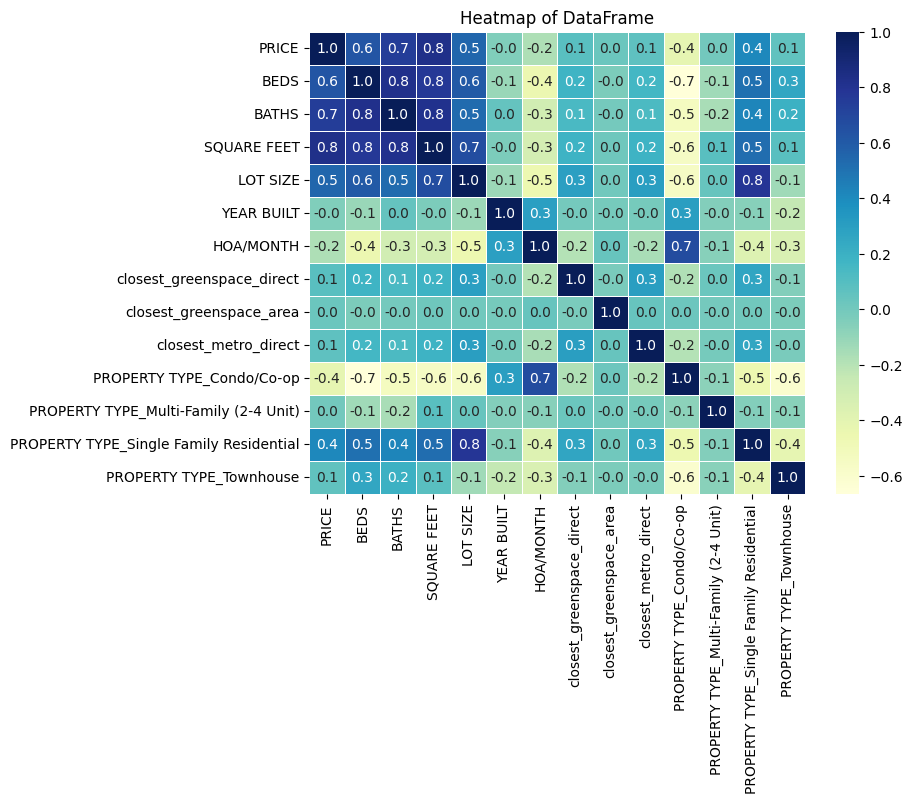

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', fmt='.1f', linewidths=.5)
plt.title('Heatmap of DataFrame')
plt.show()

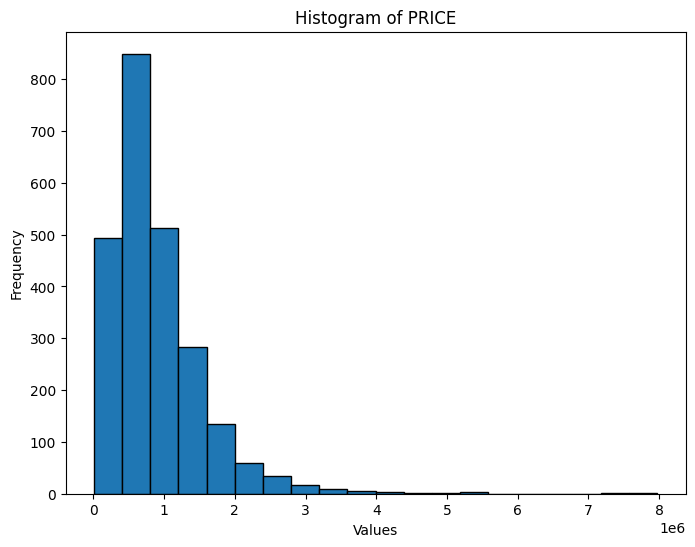

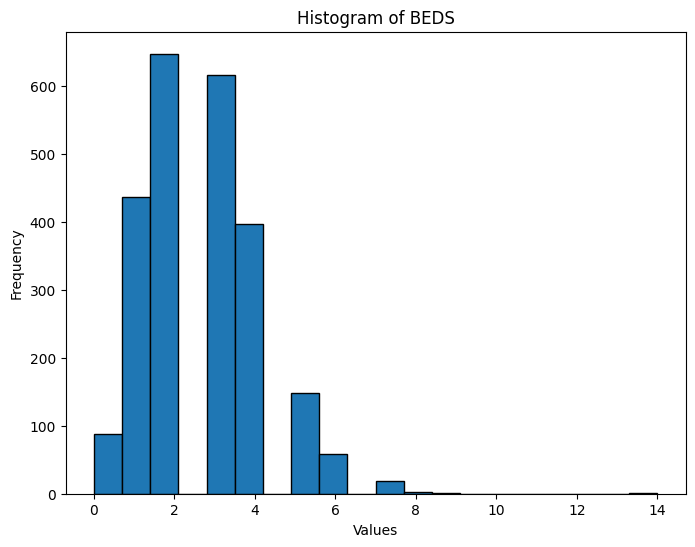

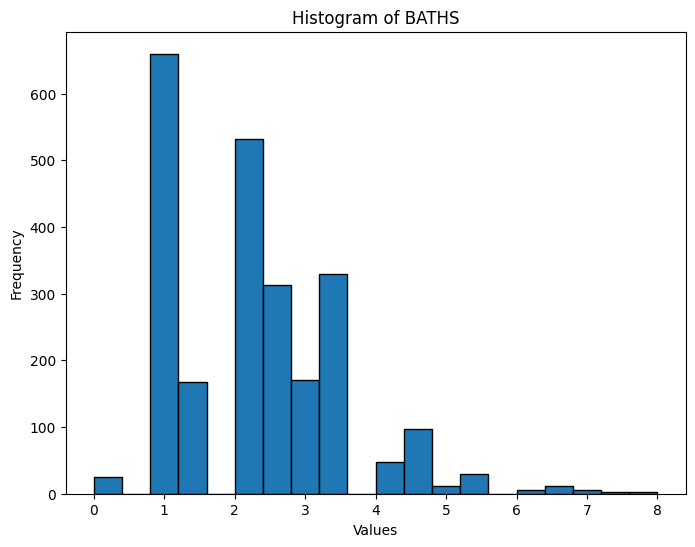

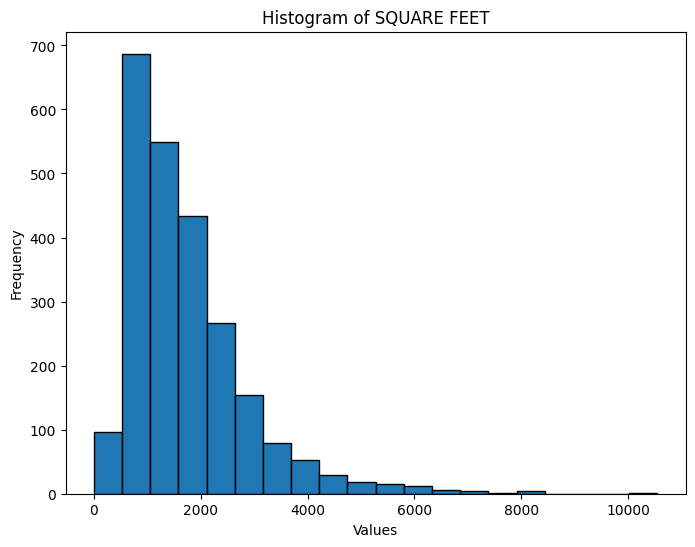

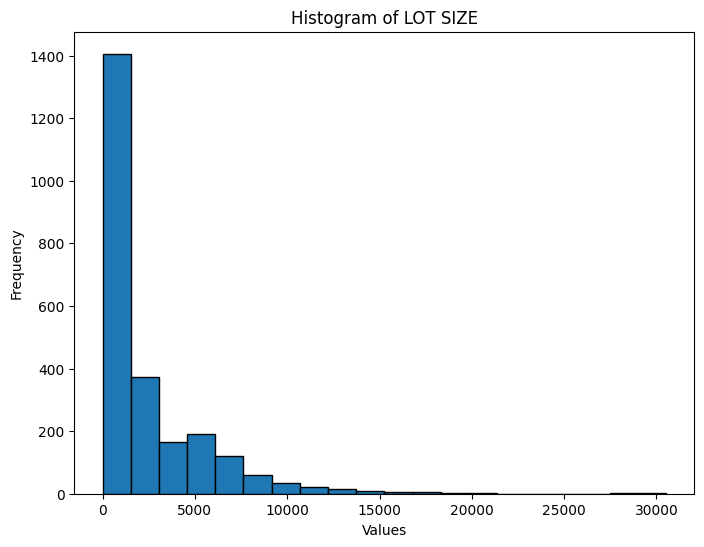

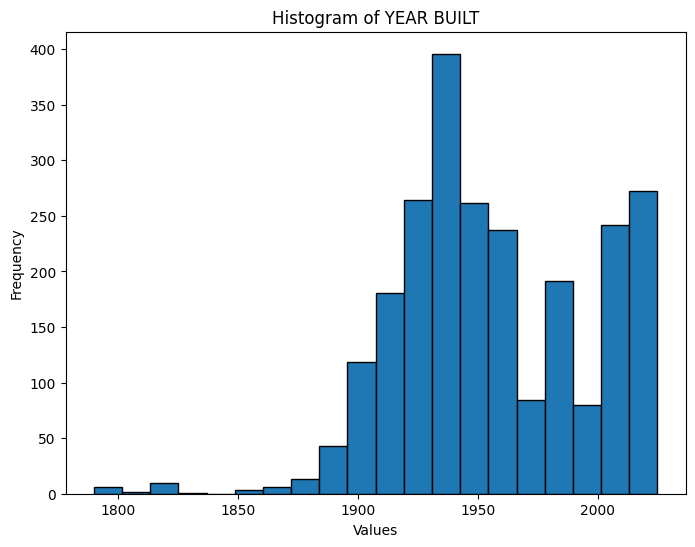

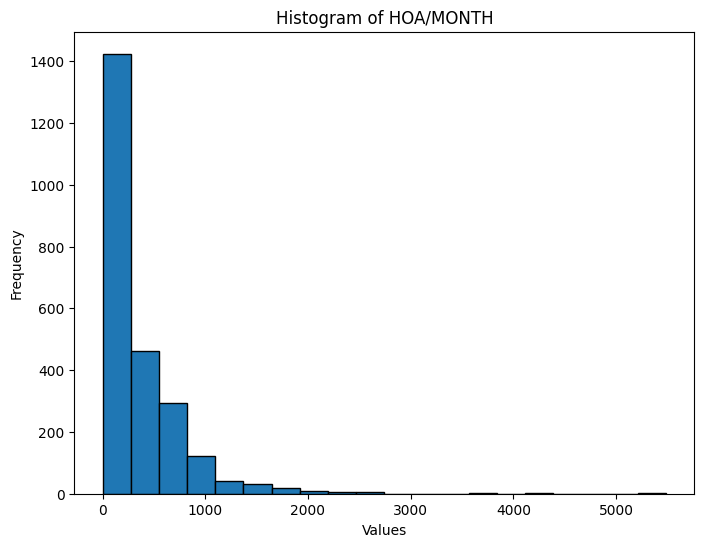

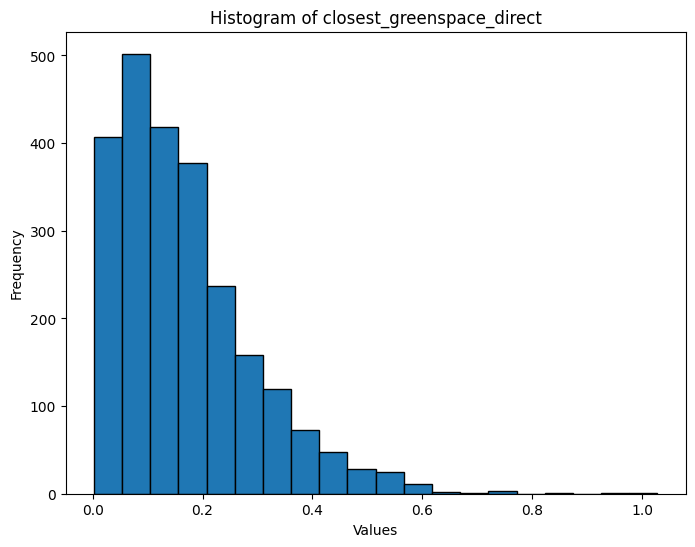

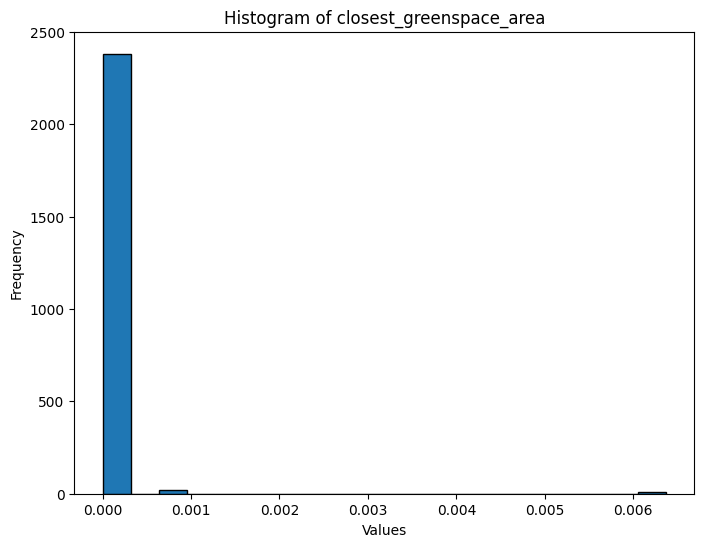

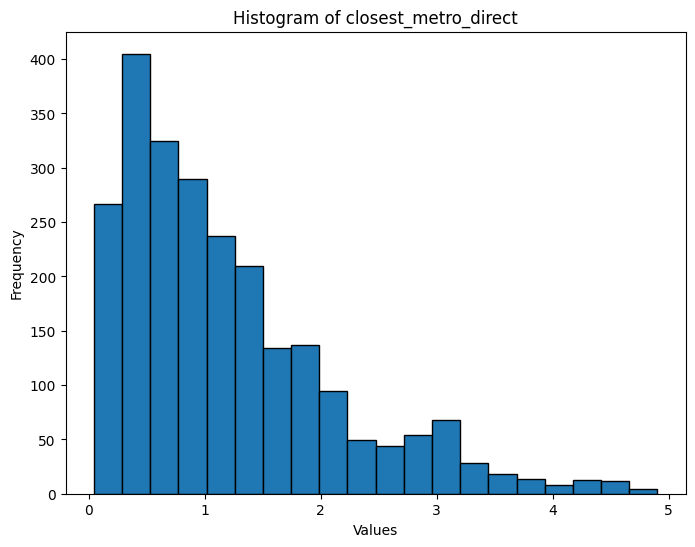

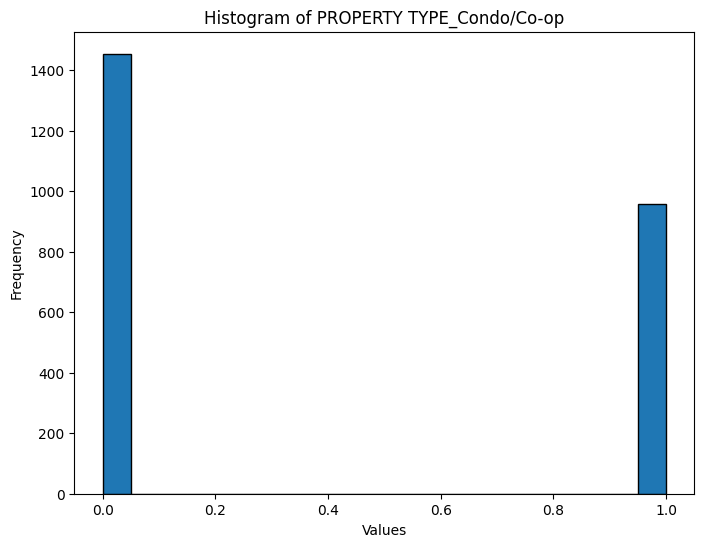

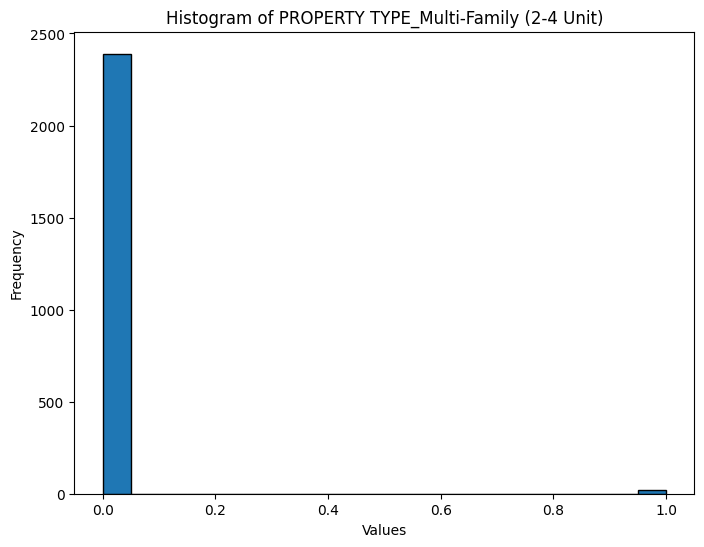

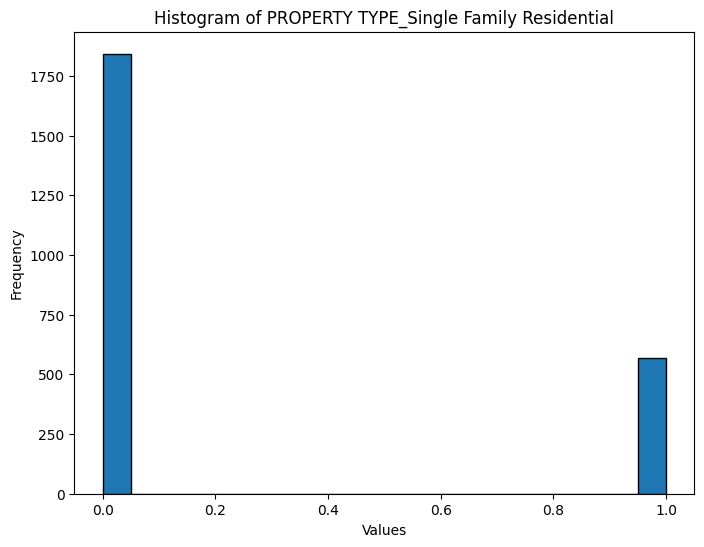

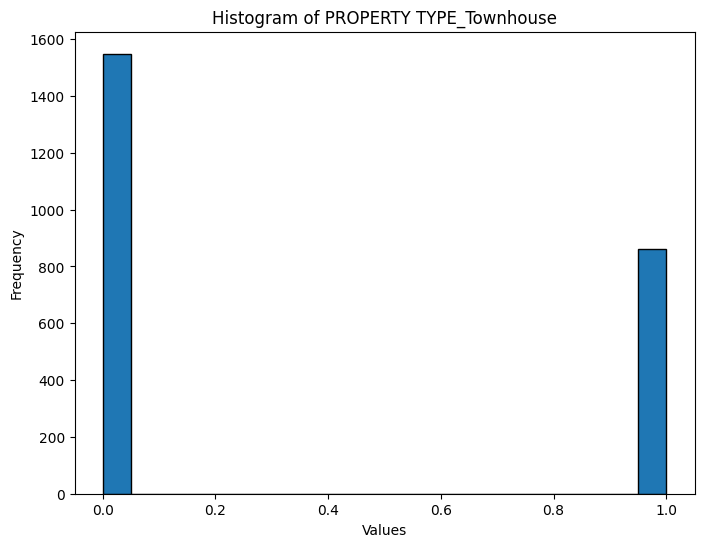

In [12]:
for col in df.columns:
  plt.figure(figsize=(8, 6))
  plt.hist(df[col], bins=20, edgecolor='black')
  plt.title('Histogram of ' + col)
  plt.xlabel('Values')
  plt.ylabel('Frequency')
  plt.show()

Check distributions of new variables before scaling, but robust scaler seems like a good bet for this project

In [13]:
X = df.drop(columns = ['PRICE'])
y = df['PRICE']

In [14]:
robust_columns = ['BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'HOA/MONTH', 'YEAR BUILT', 'closest_greenspace_direct', 'closest_greenspace_area', 'closest_metro_direct'] #Edit to include new variables
scaler = RobustScaler()
X[robust_columns] = scaler.fit_transform(X[robust_columns])

In [15]:
X

,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,HOA/MONTH,closest_greenspace_direct,closest_greenspace_area,closest_metro_direct,PROPERTY TYPE_Condo/Co-op,PROPERTY TYPE_Multi-Family (2-4 Unit),PROPERTY TYPE_Single Family Residential,PROPERTY TYPE_Townhouse
0,-1.5,-0.50,-0.790523,-0.305647,0.934426,0.411502,-0.324234,-0.126796,-0.638568,1,0,0,0
1,0.0,-0.50,-0.041066,0.232808,-0.393443,-0.203272,0.142968,-0.164699,-0.579447,0,0,0,1
2,-0.5,0.00,-0.172162,-0.305647,0.934426,1.444720,-0.324234,-0.126796,-0.638568,1,0,0,0
3,0.0,0.75,0.247976,-0.305647,0.475410,-0.203272,-0.611123,-0.125660,-0.626939,0,0,0,1
4,-1.0,-0.50,-0.606515,-0.305647,0.934426,0.738721,-0.324234,-0.126796,-0.638568,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2424,1.0,1.25,1.696347,1.861083,-0.163934,-0.203272,3.129011,0.379328,1.588453,0,0,1,0
2425,-0.5,-0.50,-0.435933,-0.305647,-0.147541,0.871591,2.688934,0.547906,1.469351,1,0,0,0
2426,-0.5,-0.50,-0.412241,-0.305647,-0.147541,0.909271,1.370198,0.788652,1.824720,0,0,0,1
2427,-0.5,-0.50,-0.435933,-0.305647,-0.147541,0.778384,1.401317,0.788652,1.800244,1,0,0,0


Model Selection:

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
linear_model = LinearRegression()

Tuning takes a while, can mess with the n_iter parameter to make quicker. I've found that xgboost tuning with this code at n_iter=100 takes 2 minutes, and random forest tuning with this code at n_iter=100 takes around 12 minutes

In [18]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.025, 0.05, 0.01],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.2],
    'reg_lambda': [0, 0.1, 0.2]
}

xgb_model = XGBRegressor(random_state=42)

random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, #decrease n_iter to speed up proccess
                                   n_iter=100, scoring='r2', cv=5,
                                   random_state=42, verbose=1, n_jobs=-1)

random_search.fit(X_train, y_train)

print("Best Parameters found: ", random_search.best_params_)
xgb_model = random_search.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters found:  {'subsample': 1.0, 'reg_lambda': 0.2, 'reg_alpha': 0, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.8}


In [19]:
xgb_model = random_search.best_estimator_

In [20]:
param_grid = {
    'n_estimators': randint(100, 1000),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

# Initialize RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, #decrease n_iter to speed up proccess
                                   n_iter=100, scoring='r2', cv=5,
                                   random_state=42, verbose=1, n_jobs=-1)

random_search.fit(X_train, y_train)

print("Best Parameters found: ", random_search.best_params_)
rf_model = random_search.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters found:  {'bootstrap': False, 'max_depth': 50, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 838}


In [21]:
scores = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='r2')
print(scores)
print(np.mean(scores))

[0.67850029 0.70610884 0.69138139 0.7528318  0.7351184 ]
0.7127881444130082


In [22]:
scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='r2')
print(scores)
print(np.mean(scores))

[0.71565779 0.76727862 0.67939539 0.80845272 0.79026827]
0.7522105549454469


In [23]:
scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')
print(scores)
print(np.mean(scores))

[0.71370544 0.74261507 0.6998903  0.72494658 0.79888887]
0.7360092521921202


Select best model based on folds, now evaluate on test data

In [24]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

The code for looking at weights of features needs to be replaced depending on which model performed best on the folds

In [25]:
y_pred = xgb_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_model.feature_importances_}) #might need to replace
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("Feature Importances:")
print(feature_importances)

R-squared (R2): 0.7589875825948176
Mean Squared Error (MSE): 109727263965.93095
Feature Importances:
                                    Feature  Importance
2                               SQUARE FEET    0.366188
1                                     BATHS    0.183902
10    PROPERTY TYPE_Multi-Family (2-4 Unit)    0.106308
9                 PROPERTY TYPE_Condo/Co-op    0.057354
11  PROPERTY TYPE_Single Family Residential    0.055373
12                  PROPERTY TYPE_Townhouse    0.038570
4                                YEAR BUILT    0.038377
5                                 HOA/MONTH    0.031506
3                                  LOT SIZE    0.031160
8                      closest_metro_direct    0.027122
7                   closest_greenspace_area    0.025361
6                 closest_greenspace_direct    0.020353
0                                      BEDS    0.018426
